In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('movies.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

In [9]:
df=pd.read_csv('movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
df=pd.read_csv('ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [18]:

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

movies.head



<bound method NDFrame.head of       movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama

In [20]:
bad_row = movies[movies['title'].str.contains ('(2006–2007)')]
print(bad_row.index)
# delete a single row by index value 0
movies = movies.drop(bad_row.index, axis=0)
#Bad_row = movies[movies['movieId'] == '171749'].index
#movies = movies.drop(index=Bad_row)
movies.shape


Int64Index([], dtype='int64')


<ipython-input-20-c4d1d501c8c2>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bad_row = movies[movies['title'].str.contains ('(2006–2007)')]


(9741, 3)

In [21]:
print("Number of Users who rated at least one movie: ", ratings.userId.nunique())
print("-"*25)

# Number of Movies in the dataset:
print("Number of Movies in the dataset:", movies.title.nunique())
print("-"*25)

# Unique of Rating points in the dataset:
print("Unique Rating points:", ratings.rating.unique())

Number of Users who rated at least one movie:  610
-------------------------
Number of Movies in the dataset: 9736
-------------------------
Unique Rating points: [4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]


In [22]:
# Combine table for movies and ratings
MvRt_dataset = pd.merge(movies, ratings, on="movieId")
# Extracting movie release years into one column
MvRt_dataset['movie_year'] = MvRt_dataset.title.str.extract('.*\((.*)\).*')
# Removing year from the movie titles
MvRt_dataset['title'] = MvRt_dataset.title.str.split('(').str[0].str[:-1]
#MvRt_dataset.to_csv (r'MvRt_dataframe.csv', index = False, header=True)
MvRt_dataset

,movieId,title,genres,userId,rating,timestamp,movie_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995
...,...,...,...,...,...,...,...
100830,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,184,4.0,1537109082,2017
100831,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,184,3.5,1537109545,2017
100832,193585,Flint,Drama,184,3.5,1537109805,2017
100833,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,184,3.5,1537110021,2018


In [23]:
def Convert(title):
    return title.lower()

In [24]:
MvRt_dataset.title = MvRt_dataset.title.apply(Convert)
movies.title = movies.title.apply(Convert)



In [25]:
# Combine table for User ID - Movie ID 
UsMv_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')

# Replace NA with 0
UsMv_dataset.fillna(0,inplace=True)
UsMv_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
movieId_dict = MvRt_dataset.drop_duplicates('title')[['movieId', 'title']].set_index('movieId').to_dict()['title']
#list(movieId_dict.items())[:5]
MvTl_dataset = MvRt_dataset.pivot_table(index="userId", columns='movieId', values="rating").fillna(0)
# Replacing dataRecommendation columns with the movie titles
MvTl_dataset.columns = MvTl_dataset.columns.map(movieId_dict)
MvTl_dataset.head(5)

movieId,toy story,jumanji,grumpier old men,waiting to exhale,father of the bride part ii,heat,sabrina,tom and huck,sudden death,goldeneye,...,gintama: the movie,anohana: the flower we saw that day - the movie,silver spoon,love live! the school idol movie,jon stewart has left the building,black butler: book of the atlantic,no game no life: zero,flint,bungo stray dogs: dead apple,andrew dice clay: dice rules
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Removing Noise from the data
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')


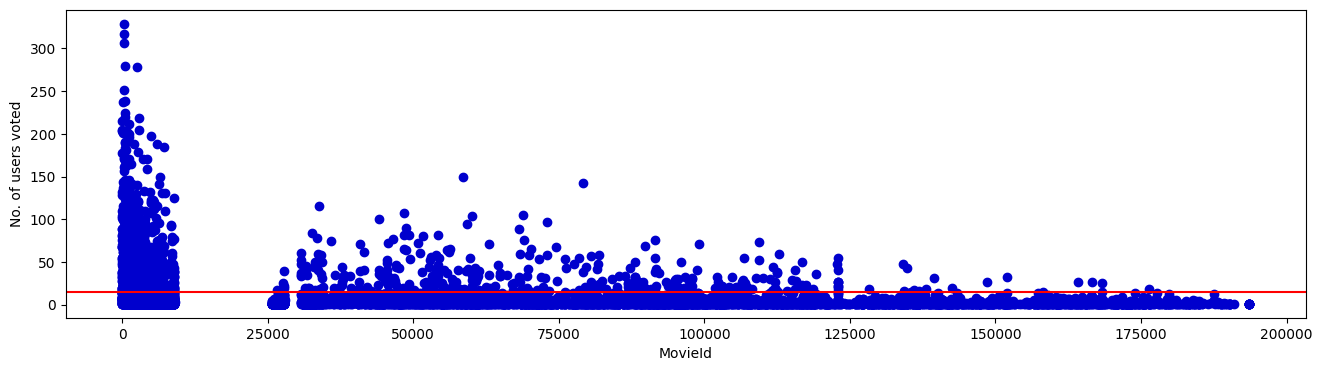

In [28]:
#Assumption on valid candidates:
# To qualify a movie, a minimum of y=15 users should have voted a movie.
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumblue')
plt.axhline(y=15,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()
# Making the necessary modifications as per the 15 users
UsMv_dataset = UsMv_dataset.loc[no_user_voted[no_user_voted > 15].index,:]


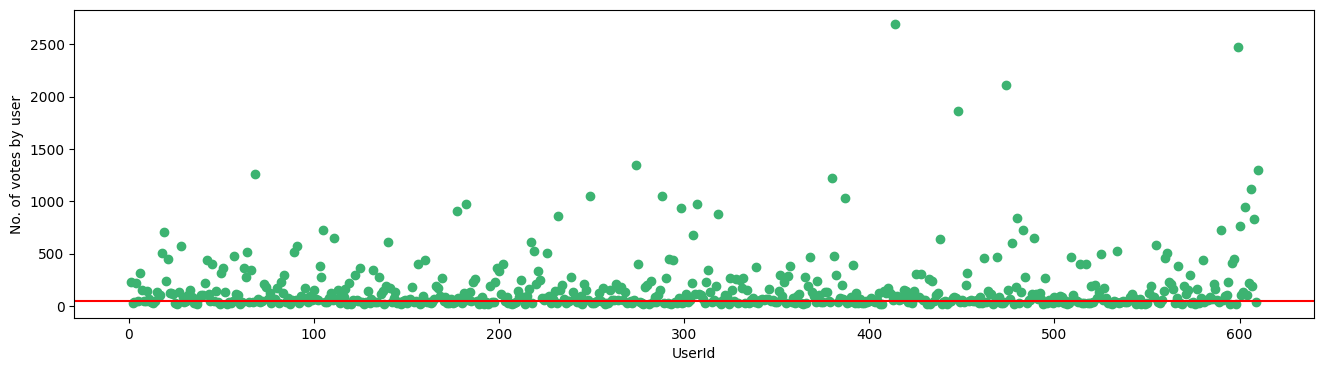

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0


In [29]:
# To qualify a user, a minimum of 50 movies should have voted by the user
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()
# Making the necessary modifications as per the 50 movies
UsMv_dataset=UsMv_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
UsMv_dataset.head(5)


In [30]:
MvRt_mc = pd.DataFrame(MvRt_dataset.groupby('title')['rating'].mean().sort_values(ascending = False))
MvRt_mc["NumOfRatings"] = MvRt_dataset.groupby('title')["rating"].count().sort_values(ascending = False)
MvRt_mc.sort_values(by=['NumOfRatings', 'rating'],inplace=True, ascending=False)
MvRt_mc.drop(MvRt_mc[MvRt_mc.rating < 3].index, inplace=True)
MvRt_mc

,rating,NumOfRatings
title,,
forrest gump,4.164134,329
"shawshank redemption, the",4.429022,317
pulp fiction,4.197068,307
"silence of the lambs, the",4.161290,279
"matrix, the",4.192446,278
...,...,...
nina takes a lover,3.000000,1
eve's bayou,3.000000,1
"swamp, the",3.000000,1


In [33]:
import plotly.express as px


def ecdf():
    print("ECDF plot here!")


px.ecdf = ecdf

In [34]:
title_rating = MvRt_mc['rating'] * MvRt_mc['NumOfRatings']
title_rating = title_rating.sort_values(ascending = False).head(20)
fig = px.bar(title_rating, x=title_rating.index, y=title_rating, text=title_rating,
             labels={
                 "index": "Movie Title",
                 'y': 'Frequency'},
             color=title_rating
             )
fig.update_traces(textposition='outside')
fig.update_layout(title_text='20 Top Rated Movies',
                  title_x=0.5, title_font=dict(size=24))
fig.update_traces(marker=dict(line=dict(color='MediumPurple', width=2)))
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

In [35]:
#  Dropping duplicate movie titles
unique_movie = MvRt_dataset.drop_duplicates(['title'])
# Count of each years movie frequency
unique_movie = unique_movie.movie_year.value_counts().reset_index().sort_values('index')
fig = px.line(unique_movie, x='index', y='movie_year',
              labels={
                  "index": "Movie Release Year",
                  'movie_year': 'Number of Movies Released'})
fig.update_layout(title_text='Number of Movies Released each Year',
                  title_x=0.5, title_font=dict(size=24))
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

In [37]:
#  Count unique movies for each genres
genres_value_counts = MvRt_dataset.drop_duplicates('movieId')['genres'].str.split('|', expand=True).stack().value_counts()
#print(genres_value_counts)
fig = px.bar(genres_value_counts, x=genres_value_counts.index, y=genres_value_counts, text=genres_value_counts,
             labels={
                 "index": "Genres",
                 'y': 'Frequency'},
             color=genres_value_counts
             )
fig.update_traces(textposition='outside')
fig.update_layout(title_text='Top Frequent the Movie Genres',
                  title_x=0.5, title_font=dict(size=24))
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

In [38]:
UsMv_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152081,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
164179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
166528,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [41]:
def get_movie_recommendation(movie_name):
    try:
        movie_name = movie_name.lower()
        n_movies_to_reccomend = 10
        movie_list = movies[movies['title'].str.contains(movie_name)]  
        if len(movie_list):        
            movie_idx= movie_list.iloc[0]['movieId']
            movie_idx = UsMv_dataset[UsMv_dataset['movieId'] == movie_idx].index[0]
            distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
            rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
            recommend_frame = []
            for val in rec_movie_indices:
                movie_idx = UsMv_dataset.iloc[val[0]]['movieId']
                idx = UsMv_dataset[UsMv_dataset['movieId'] == movie_idx].index
                recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
            df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
            return df
        else:
            return "No movies found. Please check your input"
    except:
            return "No movies found. Please check your input"   


In [42]:
get_movie_recommendation('Toy Story')

'No movies found. Please check your input'

In [43]:
def Rec(movieName):
    movieName = movieName.lower()
    userRatings = MvTl_dataset[movieName]
    similar_movies = MvTl_dataset.corrwith(userRatings)
    print(similar_movies)
    corr_movie = pd.DataFrame(similar_movies, columns=["Correlation"])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(MvRt_mc.NumOfRatings)
    print(corr_movie)
    Sugg = corr_movie[corr_movie.NumOfRatings > 50].sort_values("Correlation", ascending = False)
    return Sugg[:10]

In [44]:

Rec('peter pan')


movieId
toy story                             0.259478
jumanji                               0.279478
grumpier old men                      0.117674
waiting to exhale                     0.003635
father of the bride part ii           0.161390
                                        ...   
black butler: book of the atlantic   -0.010637
no game no life: zero                -0.010637
flint                                -0.010637
bungo stray dogs: dead apple         -0.010637
andrew dice clay: dice rules         -0.010637
Length: 9723, dtype: float64
                                  Correlation  NumOfRatings
                                     0.226782          42.0
'71                                 -0.010637           1.0
'burbs, the                          0.146519          17.0
'hellboy': the seeds of creation    -0.010637           1.0
'night mother                        0.122240           1.0
...                                       ...           ...
NaN                       

,Correlation,NumOfRatings
alice in wonderland,0.642311,69.0
"little mermaid, the",0.547155,67.0
lady and the tramp,0.495110,55.0
pinocchio,0.493018,61.0
mary poppins,0.483921,71.0
fantasia,0.477075,53.0
snow white and the seven dwarfs,0.454258,77.0
"goonies, the",0.430701,57.0
"wizard of oz, the",0.401739,92.0
beetlejuice,0.399902,91.0


In [47]:
def KNN_movie_recommendation(movie_name):
    try:
        n_movies_to_reccomend = 10
        movie_name = movie_name.lower()
        recommendation_result = list(knn.kneighbors([MvTl_dataset[movie_name].values], (n_movies_to_reccomend+1)))
        recommendations = pd.DataFrame(np.vstack((recommendation_result[1], recommendation_result[0])), 
                                       index=['movieId', 'Cosine_Similarity (degree)']).T
        recommendations = recommendations.drop([0]).reset_index(drop=True)
        a = MvTl_dataset.columns.to_frame().reset_index(drop=True).to_dict()['movieId']
        recommendations.movieId = recommendations.movieId.map(a)
        return recommendations
    except:
             return "No movies found. Please check your input"

In [57]:
KNN_movie_recommendation('father of the bride part ii	')


'No movies found. Please check your input'

In [53]:
# Prepare data to use title and genres as metadata
temp_MvRt = MvRt_dataset
temp_MvRt['text'] = temp_MvRt[['genres', 'title']].agg(' '.join, axis=1)
#temp_MvRt.reset_index().sort_values('index')
temp_MvRt = temp_MvRt.drop_duplicates(subset=['title'])
temp_MvRt = temp_MvRt.reset_index(drop=True)
temp_MvRt

,movieId,title,genres,userId,rating,timestamp,movie_year,text
0,1,toy story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995,Adventure|Animation|Children|Comedy|Fantasy to...
1,2,jumanji,Adventure|Children|Fantasy,6,4.0,845553522,1995,Adventure|Children|Fantasy jumanji
2,3,grumpier old men,Comedy|Romance,1,4.0,964981247,1995,Comedy|Romance grumpier old men
3,4,waiting to exhale,Comedy|Drama|Romance,6,3.0,845554349,1995,Comedy|Drama|Romance waiting to exhale
4,5,father of the bride part ii,Comedy,6,5.0,845553938,1995,Comedy father of the bride part ii
...,...,...,...,...,...,...,...,...
9390,193581,black butler: book of the atlantic,Action|Animation|Comedy|Fantasy,184,4.0,1537109082,2017,Action|Animation|Comedy|Fantasy black butler: ...
9391,193583,no game no life: zero,Animation|Comedy|Fantasy,184,3.5,1537109545,2017,Animation|Comedy|Fantasy no game no life: zero
9392,193585,flint,Drama,184,3.5,1537109805,2017,Drama flint
9393,193587,bungo stray dogs: dead apple,Action|Animation,184,3.5,1537110021,2018,Action|Animation bungo stray dogs: dead apple


In [54]:
# Construct a reverse map of the indices and movie titles
#temp_MvRt = MvRt_cn.drop_duplicates(subset=['title'])
indices = pd.Series(temp_MvRt.index, index=temp_MvRt['title']).drop_duplicates()
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vector.fit_transform(temp_MvRt['text'])
# Get linear kernel to create a similarity matrix
from sklearn.metrics.pairwise import linear_kernel
sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)
#idx = 89338
#sim_scores = list(enumerate(sim_matrix[idx]))
#print(sim_scores)
def content_based_recommender(title, sim_scores=sim_matrix):
    title = title.lower()
    try:
        idx = indices[title]
        print(temp_MvRt['genres'].iloc[idx])
        if idx is not None:        
            sim_scores = list(enumerate(sim_matrix[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:21]
            movie_indices = [i[0] for i in sim_scores]
            return temp_MvRt[['title', 'genres']].iloc[movie_indices]
        else:
            return "No movies found. Please check your input"
    except:
            return "No movies found. Please check your input"

In [55]:
content_based_recommender('iron man')

Action|Adventure|Sci-Fi


,title,genres
7095,iron man 2,Action|Adventure|Sci-Fi|Thriller|IMAX
7876,iron man 3,Action|Sci-Fi|Thriller|IMAX
3764,iron will,Adventure
1327,"man in the iron mask, the",Action|Adventure|Drama
9375,iron soldier,Action|Sci-Fi
7595,iron sky,Action|Comedy|Sci-Fi
7758,"man with the iron fists, the",Action|Adventure|Crime
5591,3-iron,Drama|Romance
2052,"iron giant, the",Adventure|Animation|Children|Drama|Sci-Fi
8666,the man from u.n.c.l.e.,Action|Adventure|Comedy
